In [98]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv

In [ ]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [103]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [105]:
# building the input vector from the 32x32 pixels
# X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
# X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [106]:
# normalizing the data to help with the training
X_train /= 255.0
X_test /= 255.0

In [107]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)

Y_train = np_utils.to_categorical(y_train, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Y_test = np_utils.to_categorical(y_test, n_classes)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()

In [ ]:
# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 50 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
391/391 [==============================] - 8s 21ms/step - loss: 0.1406 - accuracy: 0.9534 - val_loss: 0.7958 - val_accuracy: 0.7972
Epoch 2/50
391/391 [==============================] - 8s 21ms/step - loss: 0.1380 - accuracy: 0.9532 - val_loss: 0.8062 - val_accuracy: 0.7979
Epoch 3/50
391/391 [==============================] - 8s 21ms/step - loss: 0.1347 - accuracy: 0.9555 - val_loss: 0.8535 - val_accuracy: 0.7938
Epoch 4/50
391/391 [==============================] - 8s 20ms/step - loss: 0.1343 - accuracy: 0.9548 - val_loss: 0.8266 - val_accuracy: 0.7900
Epoch 5/50
391/391 [==============================] - 8s 20ms/step - loss: 0.1397 - accuracy: 0.9545 - val_loss: 0.8129 - val_accuracy: 0.7859
Epoch 6/50
391/391 [==============================] - 8s 20ms/step - loss: 0.1312 - accuracy: 0.9556 - val_loss: 0.8283 - val_accuracy: 0.7926
Epoch 7/50
391/391 [==============================] - 8s 20ms/step - loss: 0.1265 - accuracy: 0.9573 - val_loss: 0.8219 - val_accuracy: 0.7928

In [ ]:
# save model into output folder
model.save("/content/drive/MyDrive/CIFAR-10/output")

In [ ]:
# load saved model
my_model = keras.models.load_model('/content/drive/MyDrive/CIFAR-10/output')

In [115]:
def result(i):
  res = ""
  if i == 0:
    res = "máy bay"
  if i == 1:
    res = "xe ô tô"
  if i == 2:
    res = "chim"
  if i == 3:
    res = "mèo"
  if i == 4:
    res = "hươu"
  if i == 5:
    res = "chó"
  if i == 6:
    res = "ếch"
  if i == 7:
    res = "ngựa"
  if i == 8:
    res = "thuyền"
  if i == 9:
    res = "xe tải"
  return res

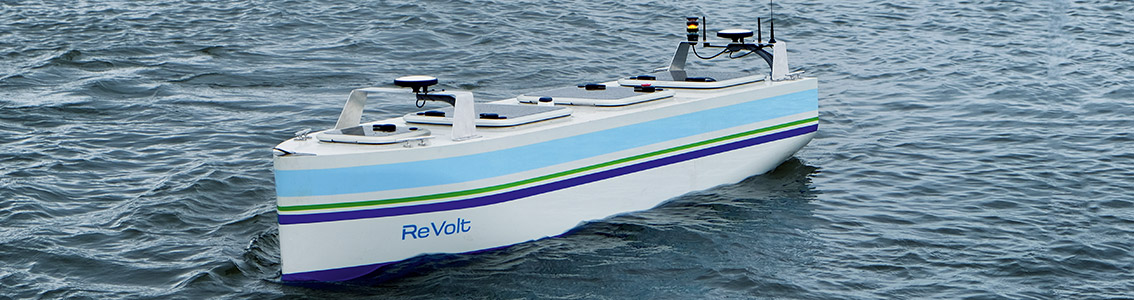

In [112]:
# load the input image
path = "/content/drive/MyDrive/CIFAR-10/input/ship.jpg"
img = load_img(path, target_size=(32, 32))

# convert to array
img = img_to_array(img)

# reshape into a single sample with 3 channels
img = img.reshape(1, 32, 32, 3)

# prepare pixel data
img = img.astype('float32')
img = img / 255.0

from google.colab.patches import cv2_imshow
# show input image
img1 = cv.imread(path)
cv2_imshow(img1)

In [ ]:
# predict model
res = my_model.predict_classes(img)

In [116]:
# print result
print(result(res))

thuyền
